**1**. (10 points) Using the `bash` shell, count the number of lines in `/var/log/dpkg.log` where `c++` or `g++` occurs.

In [2]:
%%bash

grep -E "[g|c]\+\+" /var/log/dpkg.log | wc -l

32


**2**. (10 points) The `/etc/passwd` file is a colon-separated file that contains the following information:

- User name.
- Encrypted password.
- User ID number (UID)
- User's group ID number (GID)
- Full name of the user (GECOS)
- User home directory.
- Login shell.

Using `bash`, show all unique user names.

In [10]:
%%bash

cut -f1 -d: /etc/passwd | sort | uniq

backup
bin
daemon
games
gnats
irc
jovyan
list
lp
mail
man
messagebus
news
nobody
proxy
root
sync
sys
systemd-bus-proxy
systemd-network
systemd-resolve
systemd-timesync
uucp
www-data


**3**. (10 points) Treating `MockExam01.ipynb` as a JSON file, write code to count the number of `markdown` cells in it.

In [51]:
import json

In [52]:
with open('MockExam01.ipynb') as f:
    doc = json.load(f)

In [53]:
doc.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

In [54]:
sum(1 for cell in doc['cells'] if cell['cell_type'] == 'markdown')

1

**4**. (10 points) Find the least squares linear solution to the following data

```
y = [1,2,3,4]
x1 = [1,2,3,4]
x2 = [2,3,4,5]
```

That is, find the "best" intercept and slope for the variables `x1` and `x2`.

In [12]:
import numpy as np

In [15]:
X = np.array([[1,2,3,4], [2,3,4,5]]).T
X = np.c_[np.ones(4), X]
X

array([[ 1.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 1.,  3.,  4.],
       [ 1.,  4.,  5.]])

In [16]:
y = np.array([1,2,3,4])

In [22]:
intercept, beta1, beta2 = np.linalg.lstsq(X, y)[0]

In [23]:
intercept, beta1, beta2

(-0.33333333333333182, 0.66666666666666607, 0.33333333333333387)

**5**. (10 points) Create the following matrix using `np.fromfunction`

```python
array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])
```

In [26]:
np.fromfunction(lambda i, j: np.where(np.abs(i-j)==1, 1, 0), (6,6))

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

**6**. (10 points)Create the following matrix using `np.fromfunction`

```python
array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])
```

In [30]:
np.fromfunction(lambda i, j: np.abs(i-3) + np.abs(j-3), (7,7), dtype='int')

array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])

**7**. (10 points) Using the URL template pattern for the PokeAPI berry flavor REST API GET 

`https://pokeapi.co/api/v2/berry-flavor/{id or name}`

display the sorted names of all berries with the `spicy` flavor name. 

Use the `requests` package to retrieve the resource.

In [32]:
import requests

In [41]:
req = requests.get('https://pokeapi.co/api/v2/berry-flavor/spicy')

In [43]:
data = req.json()

In [54]:
sorted([item['berry']['name'] for item in data['berries']])

['apicot',
 'babiri',
 'belue',
 'charti',
 'cheri',
 'chople',
 'enigma',
 'figy',
 'hondew',
 'lansat',
 'leppa',
 'liechi',
 'lum',
 'nomel',
 'occa',
 'oran',
 'persim',
 'petaya',
 'pinap',
 'pomeg',
 'qualot',
 'razz',
 'rindo',
 'rowap',
 'shuca',
 'spelon',
 'starf',
 'tamato',
 'tanga']

**8**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [57]:
%load_ext rpy2.ipython

In [58]:
mtcars = %R mtcars

In [59]:
mtcars.head()

mpg  cyl   disp     hp  drat     wt   qsec   vs   am  \
Mazda RX4          21.0  6.0  160.0  110.0  3.90  2.620  16.46  0.0  1.0   
Mazda RX4 Wag      21.0  6.0  160.0  110.0  3.90  2.875  17.02  0.0  1.0   
Datsun 710         22.8  4.0  108.0   93.0  3.85  2.320  18.61  1.0  1.0   
Hornet 4 Drive     21.4  6.0  258.0  110.0  3.08  3.215  19.44  1.0  0.0   
Hornet Sportabout  18.7  8.0  360.0  175.0  3.15  3.440  17.02  0.0  0.0   

                   gear  carb  
Mazda RX4           4.0   4.0  
Mazda RX4 Wag       4.0   4.0  
Datsun 710          4.0   1.0  
Hornet 4 Drive      3.0   1.0  
Hornet Sportabout   3.0   2.0

In [62]:
mtcars.groupby('gear')[['wt', 'mpg']].mean()

wt        mpg
gear                     
3.0   3.892600  16.106667
4.0   2.616667  24.533333
5.0   2.632600  21.380000

**9**. (10 points) Read the `iris` data frame from R to a `pandas` DataFrame. Make a `seaborn` plot showing a linear regression of `Petal.Length` (y) against `Sepal.Length` (x). Make a separate regression line for each `Species`.

In [63]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [65]:
import seaborn as sns

In [68]:
iris = %R iris

In [69]:
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

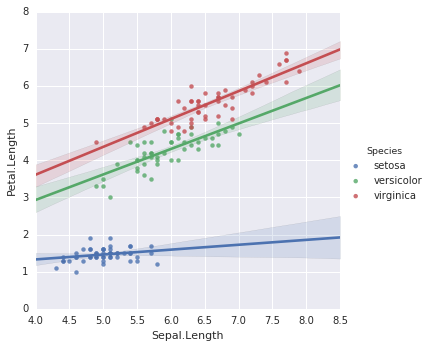

In [71]:
sns.lmplot(x='Sepal.Length', y='Petal.Length', hue='Species', data=iris)
pass

**10**. (10 points) Suppose IQ is distributed uniformly between 0 and 200. If your IQ is 120, what percentile of IQ are you? Find the answer by using an analytic function and by using a simulation with 1 million people. Plot a graph showing the CDF of the IQ distribution, shading the region below 120 in red.

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
dist = stats.uniform(0, 200)

In [15]:
dist.cdf(120)

0.59999999999999998

In [16]:
n = int(1e6)
rvs = dist.rvs(n)
(rvs < 120).sum()/n

0.60070100000000004

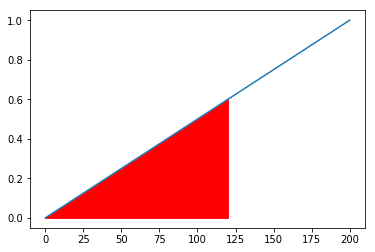

In [17]:
x = np.linspace(0, 200, 100)
plt.plot(x, dist.cdf(x))
x1 = np.linspace(0, 120, 100)
plt.fill_between(x1, dist.cdf(x1), color='red')
pass